# Prediction of Airline Ticket Fare Using ML

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
train_data=pd.read_excel(r'D:\Data Science Project1\Flight_Price_DataSet/Data_Train.xlsx')

In [109]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [111]:
train_data.dropna(inplace=True)

In [112]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [113]:
#Doing copy bcz we want to do manipulation in the data and also keep the origina data for the reference. 

In [114]:
data=train_data.copy()

In [115]:
def convert_into_datetime(col):
    data[col]= pd.to_datetime(data[col])

In [116]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [117]:
for items in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_into_datetime(items)
    

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide format or 

In [118]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [119]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [120]:
data['Journey_Day']=data['Date_of_Journey'].dt.day
data['Journey_Month']=data['Date_of_Journey'].dt.month
data['Journey_Year']=data['Date_of_Journey'].dt.year

In [121]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [122]:
#Extraction of hour and minutes from departure time and arrival time. 

def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [123]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [124]:
extract_hour_min(data,'Arrival_Time' )

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [125]:
def flight_departure_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "Afternoon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<AxesSubplot:>

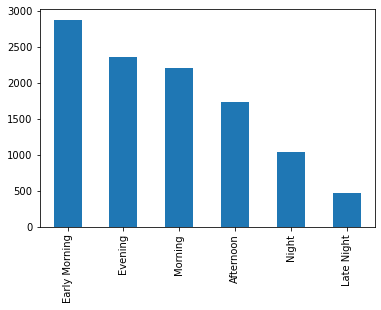

In [126]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind='bar')

In [127]:
!pip install plotly

In [128]:
!pip install cufflinks

In [129]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [130]:
cf.go_offline()

In [131]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().iplot(kind='bar')

In [132]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [133]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [134]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [135]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [136]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [137]:
data['Duration_Hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [138]:
data['Duration_Minutes']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [139]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

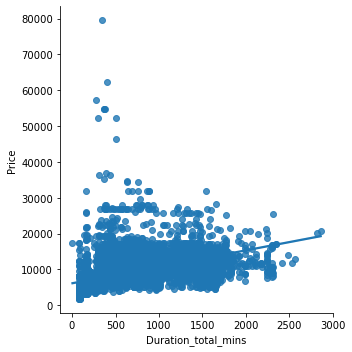

In [140]:
sns.lmplot(x='Duration_total_mins', y='Price',data=data)

In [141]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

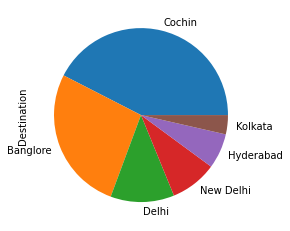

In [142]:
data['Destination'].value_counts().plot(kind='pie')

In [143]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [144]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

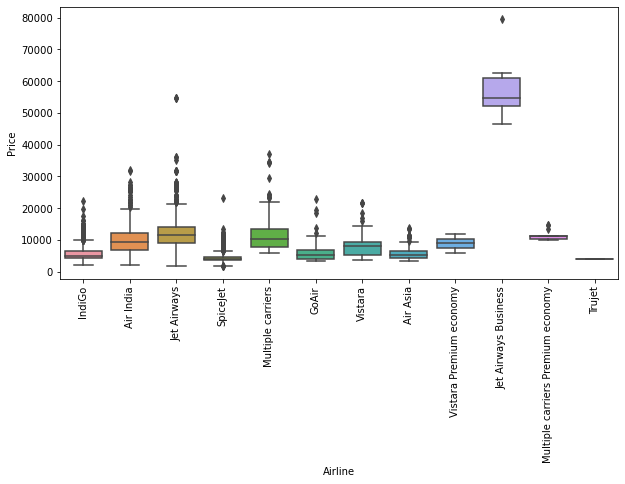

In [145]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation ='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

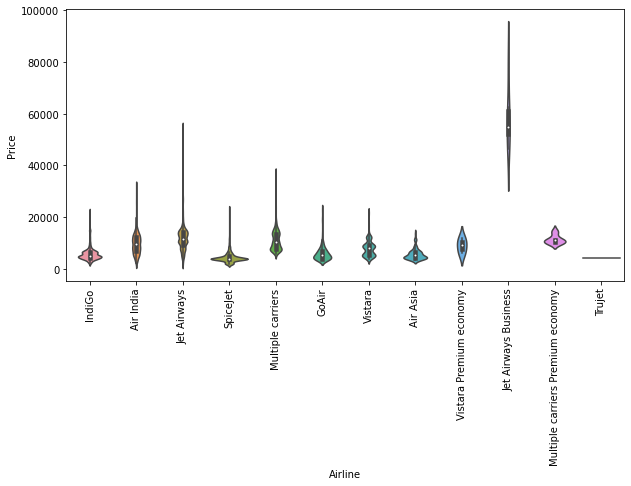

In [146]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Airline',y='Price',data=data)
plt.xticks(rotation ='vertical')

In [147]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [148]:
data.drop(columns=['Additional_Info','Route', 'Duration_total_mins','Journey_Year'],axis=1,inplace=True)


In [149]:
data.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [150]:
categorical_col=[col for col in data.columns if data[col].dtype=='object']

numerical_col=[col for col in data.columns if data[col].dtype!='object']

In [151]:
categorical_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [152]:
numerical_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_Hours',
 'Duration_Minutes']

In [153]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [154]:
# building up of hot-one encoding from scratch using simple for loop :
data['Source'].apply(lambda x:1 if x=='Banglore'else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [155]:
for item in data['Source'].unique():
    data['Source'+ item]=data['Source'].apply(lambda x:1 if x==item else 0)
    
##BUt above method is infeasible when the data is too big say 10000 cities. so next feasible mthod = target encoding

In [156]:
#airlines= data.groupby(data['Airline'])['Price'].mean().sort_values()

In [157]:
airlines= data.groupby(['Airline'])['Price'].mean().sort_values().index


In [158]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [159]:
#Converting this index in dictoinary 

In [160]:
dict1={key:index for index,key in enumerate (airlines,0)}

In [161]:
data['Airline'].map(dict1)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [162]:
data['Airline']=data['Airline'].map(dict1)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [163]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [164]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [165]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [166]:
Destins=data.groupby(['Destination'])['Price'].mean().sort_values().index
Destins

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [167]:
dict2={key:index for index,key in enumerate (Destins,0)}

In [168]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [169]:
data['Destination']=data['Destination'].map(dict2)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [170]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [171]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [172]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [173]:
data['Total_Stops']=data['Total_Stops'].map(stops)

##Outlier detection and how to deal with it?

methods available :
    1.distribution plot
    2.histogram
    3.Box plot- 5 point summary data.

In [174]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)  #distribution plot
    sns.boxplot(df[col],ax=ax2)    #Boxplot
    sns.distplot(df[col],ax=ax3,kde=False)  #histogram when kde=false

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



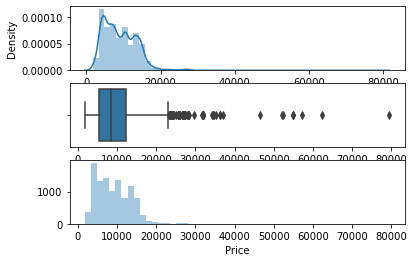

In [175]:
 plot(data,'Price')

In [176]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [177]:
data['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



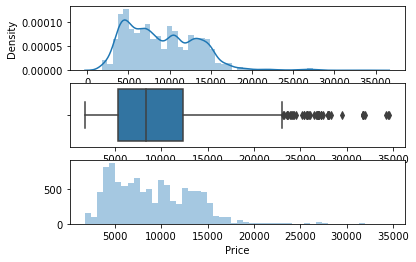

In [178]:
plot(data,'Price')

In [179]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [180]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_Day              int64
Journey_Month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_Hours           int64
Duration_Minutes         int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object

In [181]:
data.dropna(inplace=True)


In [182]:
data.isnull().sum()

Airline                0
Destination            0
Total_Stops            0
Price                  0
Journey_Day            0
Journey_Month          0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
Duration_Hours         0
Duration_Minutes       0
SourceBanglore         0
SourceKolkata          0
SourceDelhi            0
SourceChennai          0
SourceMumbai           0
dtype: int64

#Feature selection= features which are most contibuting to objective decided (Here obj is to predict fare prices)
1.f reg (correlaton)
2.mutual info reg (chi square, p value ...many onther techniques)

In [183]:
from sklearn.feature_selection import mutual_info_regression

In [184]:
#Price is dependant feature=y here in usecase.
#rest are indepe. = X

X=data.drop(['Price'],axis=1)
X

,Airline,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,40,1,0,0,0,0


In [185]:
y=data['Price']

In [186]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [187]:
mutual_info_regression(X,y)

array([0.98113398, 1.00246478, 0.78089043, 0.1971285 , 0.249526  ,
       0.33343897, 0.25077892, 0.40713936, 0.35394209, 0.47700832,
       0.33783217, 0.39007161, 0.46630269, 0.52136228, 0.13101803,
       0.20399479])

In [188]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp

,0
Airline,0.974760
Destination,0.995886
Total_Stops,0.786838
Journey_Day,0.193423
Journey_Month,0.239751
Dep_Time_hour,0.334378
Dep_Time_minute,0.255079
Arrival_Time_hour,0.401861
Arrival_Time_minute,0.348443
Duration_Hours,0.463997


In [189]:
imp.columns=['Importance']
imp

,Importance
Airline,0.974760
Destination,0.995886
Total_Stops,0.786838
Journey_Day,0.193423
Journey_Month,0.239751
Dep_Time_hour,0.334378
Dep_Time_minute,0.255079
Arrival_Time_hour,0.401861
Arrival_Time_minute,0.348443
Duration_Hours,0.463997


In [190]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,0.995886
Airline,0.974760
Total_Stops,0.786838
SourceDelhi,0.518184
Duration_Hours,0.463997
SourceKolkata,0.451232
Arrival_Time_hour,0.401861
SourceBanglore,0.399759
Arrival_Time_minute,0.348443
Duration_Minutes,0.344684


#Baisc ML model 
split vailable data to create basic ML
training data(75%of data)   and testing data(25% ofthe data)

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
ml_model=RandomForestRegressor()

In [195]:
model=ml_model.fit(X_train,y_train)

In [196]:
y_pred=model.predict(X_test)

In [197]:
y_pred

array([16693.49,  6163.12,  8814.67, ...,  3488.45,  6472.86,  6907.29])

In [198]:
y_pred.shape

(2671,)

In [199]:
#!pip install pickle

In [200]:
import pickle

In [201]:
file=open(r'D:\Data Science Project1\Flight_Price_DataSet/rf_random.pkl','wb')

In [202]:
pickle.dump(model,file)   # this is dumpling coefficient of ML l=model not entire model

In [203]:
model=open(r'D:\Data Science Project1\Flight_Price_DataSet/rf_random.pkl','rb')

In [204]:
forest=pickle.load(model)

In [205]:
forest.predict(X_test)

array([16693.49,  6163.12,  8814.67, ...,  3488.45,  6472.86,  6907.29])

In [206]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [207]:
mape(y_test,forest.predict(X_test))

13.22963261419405

In [208]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9514108251964829
Predictions are : [16762.51  6351.74  8823.78 ...  3501.62  6382.89  6874.47]


r2_score: 0.8056865426151383
MSE :  3782816.597974108
MAE :  1182.2291459283156
RMSE :  1944.9464254765755
MAPE :  13.216556887366856


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



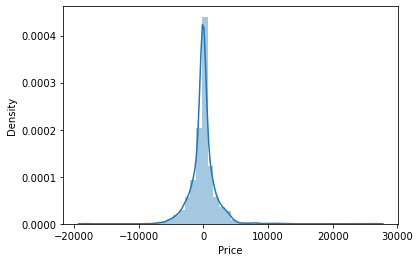

In [209]:
predict(RandomForestRegressor())

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
reg_rf=RandomForestRegressor()

In [212]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [215]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [216]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [218]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [219]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [220]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [221]:
rf_Random.best_params_

{'n_estimators': 1160,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [222]:
pred2=rf_Random.predict(X_test)

In [223]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8291923992549644